In [1]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
from drtb import *

## Initialize a domain

In [3]:
# setup a basic domain on [-1,1]^2
dom = BoxDomain([-1,-1], [1,1])

## Random point, random direction parameter sweeps

In [4]:
# pick a random point
x = dom.sample()
# pick a random direction
p = np.random.randn(len(dom))
p /= np.linalg.norm(p)

# Find how far we can go in the direction p
a1 = dom.extent(x, p)
x1 = x + a1*p
# Find how far we can go in the direction -p
a2 = dom.extent(x, -p)
x2 = x - a2*p

# Sample uniformly on the line connecting x1, x2
X = np.array([a*x1 + (1-a)*x2 for a in np.linspace(0,1,10)])

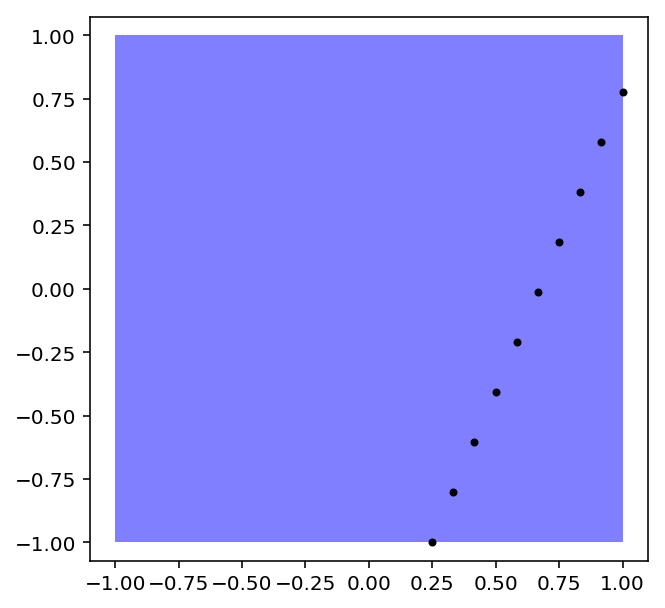

In [5]:
# Plot the sweep
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(X[:,0], X[:,1],'k.')
# plot the box domain
rect = Rectangle(dom.lb, *(dom.ub - dom.lb), edgecolor = 'none', facecolor = 'b', alpha = 0.5)
ax.add_patch(rect)
ax.axis('equal');

## Random direction sweeps
In high dimensional domains, the random point-random direction sweeps are apt to be relatively short because of the additional constraints.  Instead, we can find the point furthest along the direction $p$.

In [6]:
# pick a random direction
p = np.random.randn(len(dom))
p /= np.linalg.norm(p)

# Find the point furthest along p
x1 = dom.corner(p)
x2 = dom.corner(-p)

# Sample uniformly on the line connecting x1, x2
X = np.array([a*x1 + (1-a)*x2 for a in np.linspace(0,1,10)])

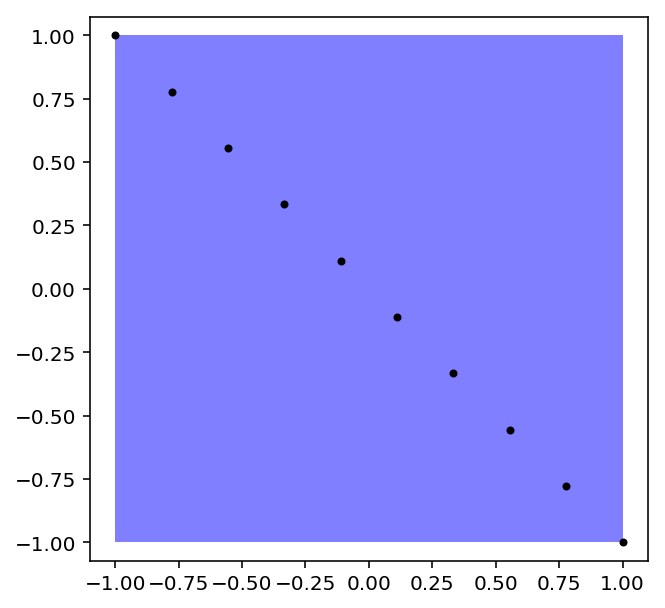

In [7]:
# Plot the sweep
fig, ax = plt.subplots(figsize = (5,5))
ax.plot(X[:,0], X[:,1],'k.')
# plot the box domain
rect = Rectangle(dom.lb, *(dom.ub - dom.lb), edgecolor = 'none', facecolor = 'b', alpha = 0.5)
ax.add_patch(rect)
ax.axis('equal');

## Real-ish example
Using an OTL circuit from https://www.sfu.ca/~ssurjano/otlcircuit.html

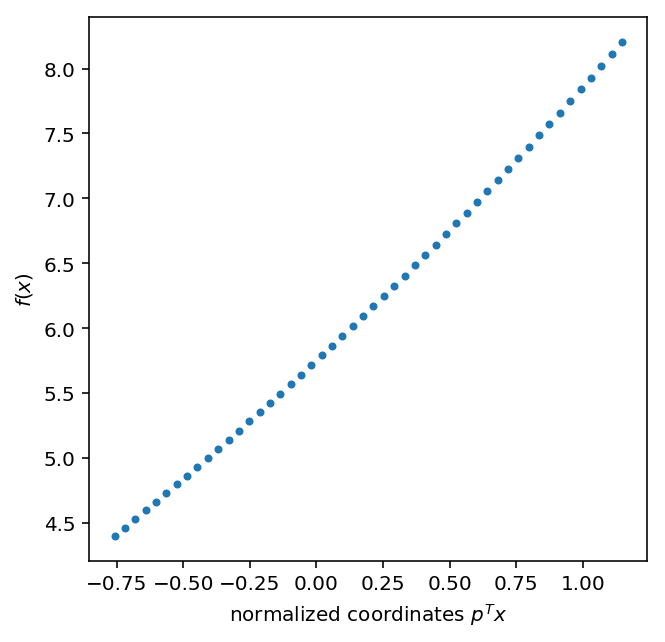

In [23]:
# Domain in application units
dom = demos.build_otl_circuit_domain()
# Domain in normalized units (-1,1)^6
dom_norm = dom.normalized_domain()

# random-point, random-direction
x_norm = dom_norm.sample()
p = np.random.randn(len(dom_norm))
p /= np.linalg.norm(p)

# Find how far we can go in the direction p
a1 = dom_norm.extent(x_norm, p)
x1_norm = x_norm + a1*p
# Find how far we can go in the direction -p
a2 = dom_norm.extent(x_norm, -p)
x2_norm = x_norm - a2*p

# Sample uniformly on the line connecting x1, x2
X_norm = np.array([a*x1_norm + (1-a)*x2_norm for a in np.linspace(0,1,50)])

# Now convert back to application units
X = dom.unnormalize(X_norm)

# Evalute the function
fX = demos.otl_circuit(X)

fig, ax = plt.subplots(figsize = (5,5))
ax.plot(np.dot(p, X_norm.T).T, fX, '.')
ax.set_xlabel('normalized coordinates $p^Tx$')
ax.set_ylabel('$f(x)$');